In [1]:
import numpy as np
import matplotlib
import os

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from scipy.stats import uniform

### Spherically symmetric systems
Since the truncated sphere is not a good representation for stellar clusters we have to finde other types of potential that can be more physically relevant for our purpose. 
For this exercise we simulate a $\textbf{Plummer sphere}$.

The density distribution for the Plummer sphere is given by

$$ 
    \rho (r) = \frac{3 M_{TOT}}{4 \pi b^3} \frac{1}{( 1 + \frac{r^2}{b^2})^{\frac{5}{2}}}
$$

where $\text{b}$ is a scale radius. The density is constant in the central region, than it scales as $\frac{1}{r^5}$ for large distances from the center.

Given this mass density profile, we can compute the mass included within a radius R as: 

$$ 
    M(R) = \int_0^R 4 \pi r^2 \rho (r) dr = \dots = \frac{3 M_{tot}}{4 \pi b^3} \frac{1}{\Big(1 + \frac{r^2}{b^2}\Big)^{3/2}}
$$


The probability function for the radii is given by dividing $M(R)$ by the total mass:

$$  P(R) = \frac{M(R)}{M_{TOT}} = \frac{R^3}{b^3} \frac{1}{\Big( 1 + \frac{R^2}{b^2} \Big)^{\frac{3}{2}}} $$

By inverting this relation we can get the distribution for the radii:

$$ R = \sqrt{\frac{b^2P(R)^{2/3}}{1-P(R)^{2/3}}}  $$

For the other coordinates, we have the usual probability functions for spherical symmetry:

$$
    p(\Phi) = \frac{1}{2 \pi}  
$$

$$
    p(\Theta) = \frac{\sin{\theta}}{2}
$$

## Stability of the system

If our system is at the equilibrium we can assume that the total number of particles is unchanged, so we need a bound system which implies a negative total energy. It is also implied that the velocity dispersion should be the same in each direction due to the isotropy of the system. We need to keep into account this fact when we want to generate the velocities distribution for our system.

In order to sample our velocities we can't use the standard methods and so we have to use the $\textbf{Montecarlo rejection method}$.

## Setting the initial parameters

In [4]:
# Initial conditions 
N = 10000
M = 1 # * N
m = M / N
b = 1

Let's sample tha radii:

In [5]:
cdf_r = uniform.rvs(0, 1, size=N)  # cumulative function of r
Rays = np.sqrt((b**2 * cdf_r**(2/3))/(1 - cdf_r**(2/3)))

Generate now the other 2 components:

In [6]:
cdf_theta = uniform.rvs(0, 1, size=N)  # cumulative function of thetas
thetas = np.arccos(1 - 2 * cdf_theta)

phis = uniform.rvs(0, 2 * np.pi, size=N) 

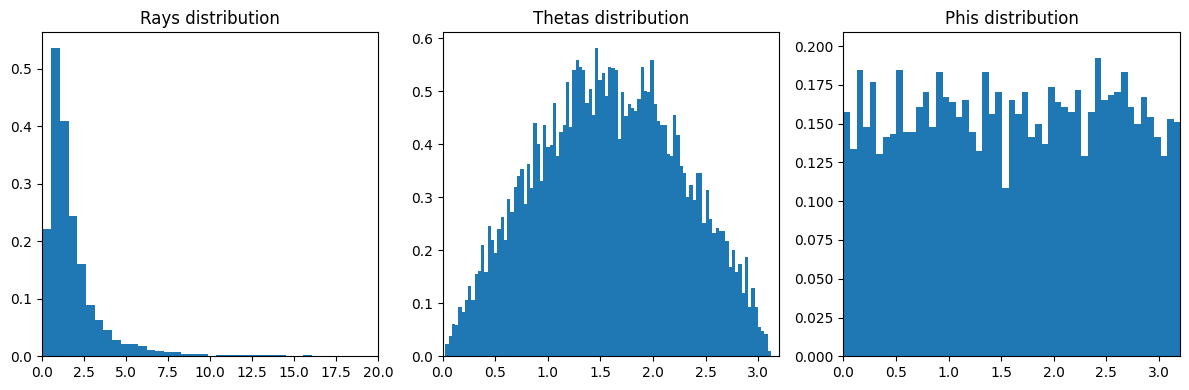

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

raggi = np.linspace(0, 20, 100)
axes[0].hist(Rays, bins=500, density=True)
axes[0].set_title("Rays distribution")
axes[0].set_xlim(0,20)


axes[1].hist(thetas, bins=100, density=True)
axes[1].set_title("Thetas distribution")
axes[1].set_xlim(0,3.2)

axes[2].hist(phis, bins=100, density=True)
axes[2].set_title("Phis distribution")
axes[2].set_xlim(0,3.2)

plt.tight_layout()


Converting now to cartesian coordinates.

In [8]:
x = Rays * np.sin(thetas) * np.cos(phis)
y = Rays * np.sin(thetas) * np.sin(phis)
z = Rays * np.cos(thetas) 


## Plot of the initial spatial distribution

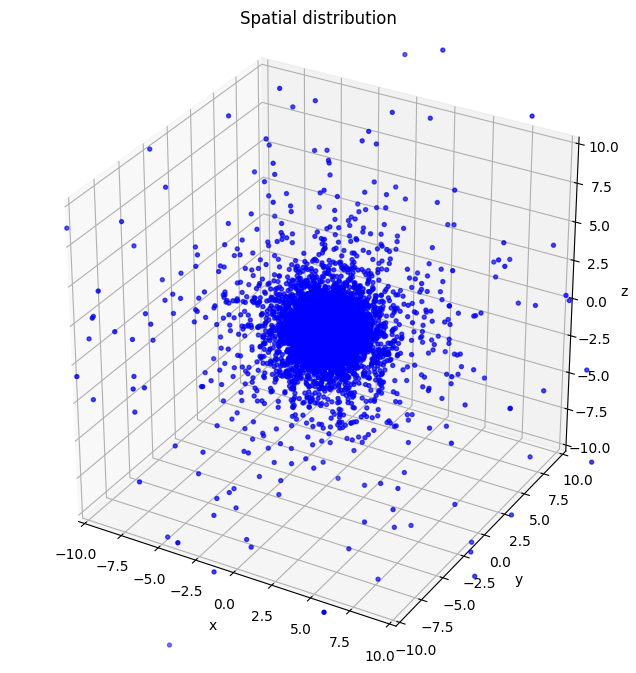

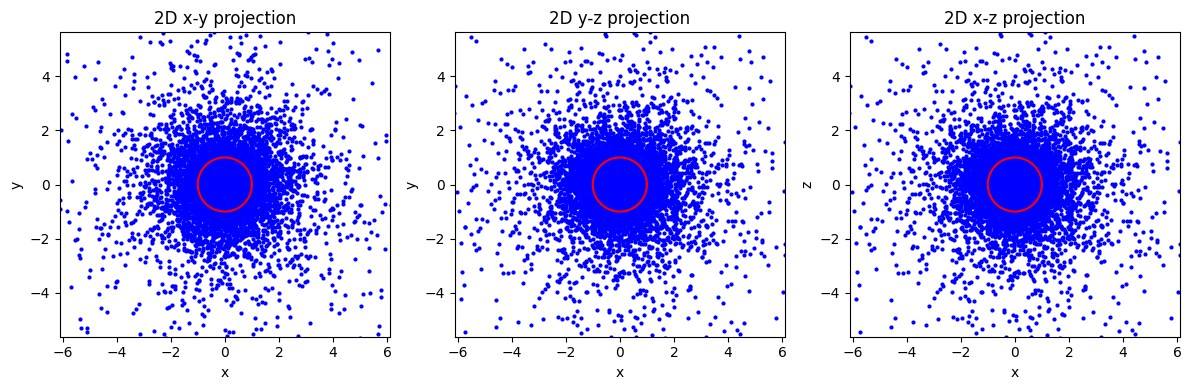

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c = 'blue', s=8)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_title("Spatial distribution")
ax.set_box_aspect([1,1,1])

plt.show();

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Projection on x-y plane
theta = np.linspace(0, 2 * np.pi, 150)
a = b * np.cos( theta )
c = b * np.sin( theta )
axes[0].scatter(x, y, c='blue', s=4)
axes[0].plot(a, c, c='red', label='b')
axes[0].axis('equal')
axes[0].set_xlim(-5, 5)
axes[0].set_ylim(-5, 5)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('2D x-y projection')

# Projection on y-z plane
axes[1].scatter(y, z, c='blue', s=4)
axes[1].plot(a, c, c='red', label='b')
axes[1].axis('equal')
axes[1].set_xlim(-5, 5)
axes[1].set_ylim(-5, 5)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('2D y-z projection')


# Projection on x-z plane
axes[2].scatter(y, z, c='blue', s=4)
axes[2].plot(a, c, c='red', label='b')
axes[2].axis('equal')
axes[2].set_xlim(-5, 5)
axes[2].set_ylim(-5, 5)
axes[2].set_xlabel('x')
axes[2].set_ylabel('z')
axes[2].set_title('2D x-z projection')

plt.tight_layout()
plt.show()

Now we have to set the initial conditions for the distribution of velocities. 
Given all the radii, we start by computing the potential at each radius using the analytical expression:
$$ \Psi = - \frac{1}{\sqrt{1 + \frac{r^2}{3b^2}}} $$

In [10]:
Psi = np.zeros(len(Rays))
for i in range(0,len(Rays)):
    Psi[i] = - (1 + (Rays[i])**2 / (3*b**2))**(-1/2)

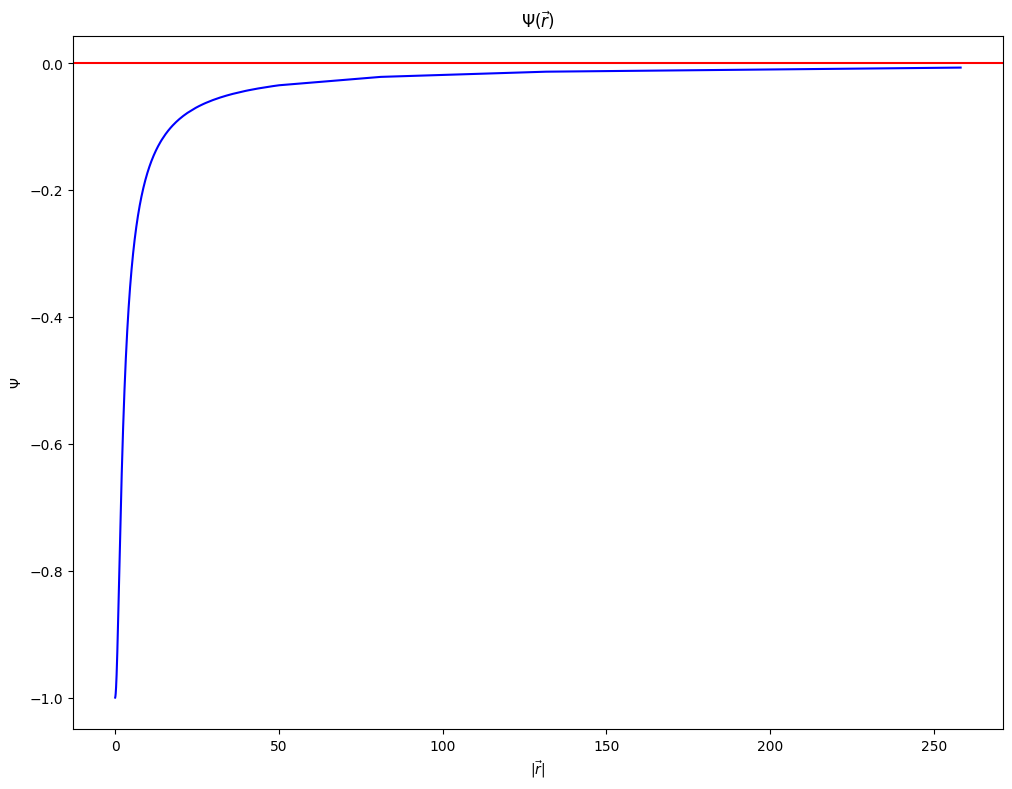

In [11]:
# Plot of the potential
plt.figure(figsize=(12,9))
plt.plot(Rays[np.argsort(Rays)], Psi[np.argsort(Rays)], c='blue')
plt.axhline(xmin=0, xmax=np.max(Rays), y=0, c='red')
plt.xlabel(r"$|\vec{r}|$")
plt.ylabel(r'$\Psi$')
plt.title(r'$\Psi(\vec{r})$')
plt.show()


In [12]:
max_pot = np.max(abs(Psi))
print(max_pot)

0.9996942091202154


The cumulative function $F(\varepsilon)$ is given by:
$$ F(\varepsilon) \propto \int_0^v \Big( \Psi - \frac{v^2}{2} \Big)^{\frac{7}{2}} v^2 dv $$
And by the substitution $ q = \frac{v}{\sqrt{2\Psi}} $ we obtain:
$$ F(\varepsilon) \propto \int_0^1 ( 1- q^2 )^{\frac{7}{2}} q^2 dq $$

The new $f(q)$ found has a maximum in $q=0.471$ where it assumes the value 0.092. So we can define a new function $g(q) = 0.092$ defined in the interval [0,1]

# Applying the Montecarlo rejection method

In [13]:
import random
q_min = 0
q_max = 1 
f_max = 0.092
y_q = 1

q = np.zeros(N)
f_q = np.zeros(N)
G = 0

for i in range(0, N):
    while y_q > (1 - q[i]**2)**(7/2) * q[i]**2:
        q[i] = uniform.rvs(0,1)
        y_q = uniform.rvs(0, 0.092)
        f_q[i] = y_q
        
    #G = uniform.rvs(0,1)
    #q[i] = G / 0.092


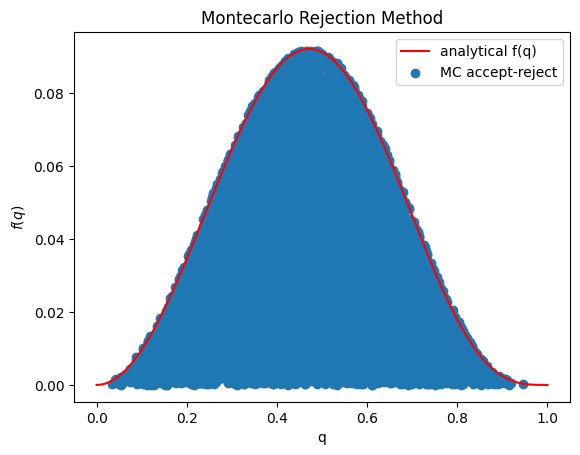

In [14]:
q_teo = np.linspace(0, 1, 1000)
plt.plot(q_teo, (1 - q_teo**2)**(7/2) * q_teo**2, color='r', label='analytical f(q)')
plt.scatter(q, f_q, label='MC accept-reject')
plt.xlabel('q')
plt.ylabel(r'$f(q)$')
plt.title('Montecarlo Rejection Method')
plt.legend()

In [15]:
velocities = q * np.sqrt(2 * -Psi)

In [16]:
theta_v = np.zeros(N)
phi_v = np.zeros(N)
v_x = np.zeros(N)
v_y = np.zeros(N)
v_z = np.zeros(N)

cdf_theta = uniform.rvs(0, 1, size=N)  # cumulative function of thetas


for i in range(0, N):
    theta_v[i] = np.arccos(1 - 2 * cdf_theta[i])
    #theta_v[i] = uniform.rvs(0, np.pi)
    phi_v[i] = uniform.rvs(0, 2*np.pi)
    
    v_x[i] = velocities[i] * np.sin(theta_v[i]) * np.cos(phi_v[i])
    v_y[i] = velocities[i] * np.sin(theta_v[i]) * np.sin(phi_v[i])
    v_z[i] = velocities[i] * np.cos(theta_v[i])
  

In [17]:
v_esc_max = np.sqrt(max_pot * 2)
print(v_esc_max)

1.4139973190358004


In [18]:
rho = ((3 * M) / (4 * np.pi * b**3) ) * (1 + (Rays/b) ** 2) ** (-2.5)
tdyn = 1/np.sqrt(np.mean(rho))

print('Dynamical time:', tdyn)
print('10 * Dynamical time:', 10*tdyn)

Dynamical time: 4.794908599446459
10 * Dynamical time: 47.94908599446459


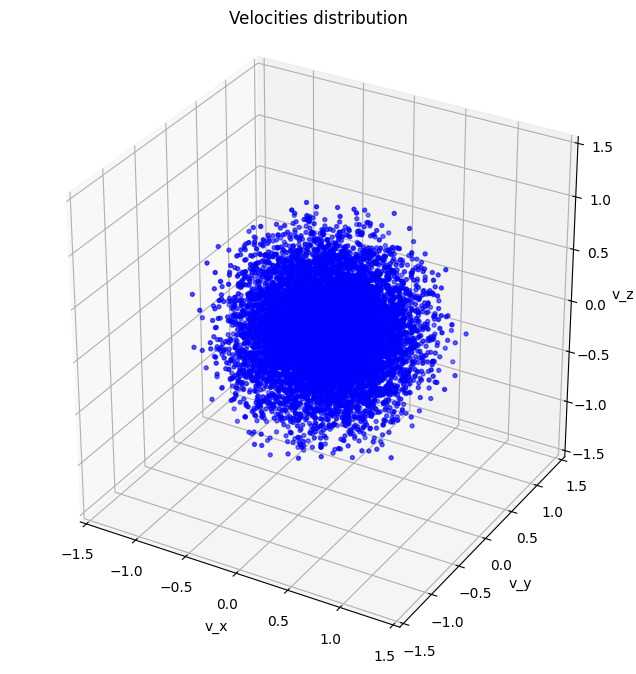

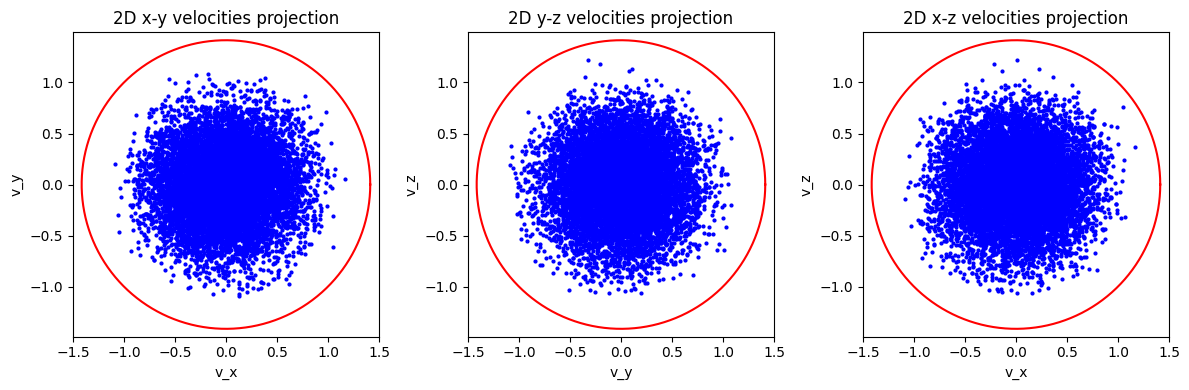

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(v_x, v_y, v_z, c = 'blue', s=8)
ax.set_aspect('equal')
ax.set_xlabel('v_x')
ax.set_ylabel('v_y')
ax.set_zlabel('v_z')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
ax.set_title("Velocities distribution")
plt.show();

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

#Projection on x-y plane
theta = np.linspace(0, 2 * np.pi, 150)
a = np.sqrt(2) * np.cos( theta )
c = np.sqrt(2) * np.sin( theta )
axes[0].scatter(v_x, v_y, c='blue', s=4)
axes[0].plot(a, c, c='red', label='v_esc')
axes[0].axis('equal')
axes[0].set_xlim(-1.5, 1.5)
axes[0].set_ylim(-1.5, 1.5)
axes[0].set_xlabel('v_x')
axes[0].set_ylabel('v_y')
axes[0].set_title('2D x-y velocities projection')


# Projection on y-z plane
axes[1].scatter(v_y, v_z, c='blue', s=4)
axes[1].plot(a, c, c='red', label='v_esc')
axes[1].axis('equal')
axes[1].set_xlim(-1.5, 1.5)
axes[1].set_ylim(-1.5, 1.5)
axes[1].set_xlabel('v_y')
axes[1].set_ylabel('v_z')
axes[1].set_title('2D y-z velocities projection')



# Projection on x-z plane
axes[2].scatter(v_x, v_z, c='blue', s=4)
axes[2].plot(a, c, c='red', label='v_esc')
axes[2].axis('equal')
axes[2].set_xlim(-1.5, 1.5)
axes[2].set_ylim(-1.5, 1.5)
axes[2].set_xlabel('v_x')
axes[2].set_ylabel('v_z')
axes[2].set_title('2D x-z velocities projection')


plt.tight_layout()
plt.show()

# Building the txt file with the initial conditions

In [20]:
# Definition Perturber 

Mp = M/100
R_in = b/2 
v_circ = np.sqrt(M/R_in)

print(m)

0.0001


In [21]:
# open the file
file = open('in_data.txt', 'w')

# write the file
file.write(f'{N+1}\n')
file.write('3\n') # dimensions
file.write('0\n')

file.write(f'{Mp}\n')

for i in range(N):
    file.write(f'{m}\n')

file.write(f'{R_in} {0} {0}\n')

for i in range(N):
    file.write(f'{x[i]} {y[i]} {z[i]}\n')

file.write(f'{0} {v_circ} {0}\n')
for i in range(N):
    file.write(f'{v_x[i]} {v_y[i]} {v_z[i]}\n')

# close the file
file.close()

# Running

In [22]:
tstop = 10*tdyn
dtime = tstop/1000
eps = 0.1
theta = 0.2
dtout = 0.1
os.system('./treecode in=in_data.txt out=output.txt dtime={} eps={} theta={} dtout={} tstop={}'.format(dtime, eps, theta, dtout, tstop));


Hierarchical N-body code (theta scan)

   nbody     dtime       eps     theta   usequad     dtout     tstop
   10001   0.04795    0.1000      0.20     false   0.10000   47.9491

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      18   3.008   10536  33726313  15343002   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       0.000 0.10224 0.19417 0.29641 0.65507 0.01399 0.01367   0.006

	data output to file output.txt at time 0.000000

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.044   10518  33903231  15177933   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       0.048 0.10224 0.19421 0.29645 0.65512 0.01399 0.01367   0.013

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.053   10546  34014545  15144549   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       0.096 0.10224 0.19421 0.29646 0.65512 0.01

	  1024.0      17   3.034   10342  33025188  15675912   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       2.685 0.10224 0.15712 0.25935 0.60580 0.01399 0.01367   0.346

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.026   10297  32931679  15707807   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       2.733 0.10223 0.15624 0.25847 0.60447 0.01399 0.01367   0.352

	data output to file output.txt at time 2.733098

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.029   10278  32966328  15568482   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       2.781 0.10223 0.15536 0.25759 0.60312 0.01399 0.01367   0.358

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.024   10234  32623215  15619098   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       2.829 0.10223 0.154

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.073   10355  32827043  15788282   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       5.418 0.10223 0.11854 0.22077 0.53693 0.01399 0.01367   0.693

	data output to file output.txt at time 5.418253

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.059   10282  32735082  15767206   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       5.466 0.10223 0.11806 0.22029 0.53593 0.01399 0.01367   0.699

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.091   10309  32874121  15710631   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       5.514 0.10223 0.11759 0.21983 0.53494 0.01399 0.01367   0.705

	data output to file output.txt at time 5.514152

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.062   10345  32796185  1

	data output to file output.txt at time 8.103414

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.052   10550  33161682  15720164   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       8.151 0.10223 0.10043 0.20266 0.49554 0.01399 0.01367   1.040

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.047   10573  33204564  15752014   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       8.199 0.10223 0.10026 0.20249 0.49511 0.01399 0.01367   1.046

	data output to file output.txt at time 8.199311

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.059   10547  33317434  15736206   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       8.247 0.10223 0.10009 0.20232 0.49470 0.01399 0.01367   1.052

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.046   10592  33296799  1

	data output to file output.txt at time 10.836497

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.053   10752  34077151  15187026   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      10.884 0.10223 0.09627 0.19851 0.48499 0.01399 0.01367   1.386

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.045   10747  33780842  15318415   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      10.932 0.10223 0.09628 0.19851 0.48500 0.01399 0.01367   1.392

	data output to file output.txt at time 10.932395

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.037   10775  33697483  15383624   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      10.980 0.10223 0.09628 0.19851 0.48501 0.01399 0.01367   1.398

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.049   10726  33807188 

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      13.570 0.10223 0.09833 0.20057 0.49027 0.01399 0.01367   1.724

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.059   10955  35458931  14544492   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      13.618 0.10224 0.09840 0.20063 0.49043 0.01399 0.01367   1.729

	data output to file output.txt at time 13.617530

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.042   10975  35221587  14691759   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      13.665 0.10223 0.09846 0.20069 0.49060 0.01399 0.01367   1.736

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.050   10952  35411004  14573425   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      13.713 0.10223 0.09853 0.20076 0.49077 0.01399 0.01367   1.742

	data output to fi

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      16.303 0.10223 0.10059 0.20282 0.49595 0.01399 0.01367   2.065

	data output to file output.txt at time 16.302666

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.069   11021  36400658  14132557   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      16.351 0.10223 0.10060 0.20283 0.49597 0.01399 0.01367   2.071

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.045   10992  36052283  14311923   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      16.399 0.10223 0.10060 0.20284 0.49598 0.01399 0.01367   2.077

	data output to file output.txt at time 16.398563

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      15   3.060   11006  36197830  14173436   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      16.447 0.10223 0.10061 0.20284 

	  1024.0      16   3.029   10996  35851055  14392942   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      19.036 0.10223 0.10085 0.20309 0.49660 0.01399 0.01367   2.405

	data output to file output.txt at time 19.035749

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.017   10924  35748574  14356802   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      19.084 0.10223 0.10088 0.20311 0.49666 0.01399 0.01367   2.411

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      18   3.030   10998  35968587  14300748   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      19.132 0.10223 0.10091 0.20314 0.49673 0.01399 0.01367   2.417

	data output to file output.txt at time 19.131647

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.035   10981  36048722  14231661   0.006

        time   |T+U|       T      -U    -T/

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.050   11024  36352431  14032893   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      21.769 0.10223 0.10213 0.20436 0.49974 0.01399 0.01367   2.746

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.034   11018  36148043  14141857   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      21.817 0.10223 0.10215 0.20439 0.49980 0.01399 0.01366   2.751

	data output to file output.txt at time 21.816782

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      18   3.036   10980  35918418  14220359   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      21.865 0.10223 0.10218 0.20441 0.49986 0.01399 0.01367   2.757

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.036   10952  35955976  14179727   0.006

        time   |T+U|       T    

      24.454 0.10223 0.10284 0.20508 0.50149 0.01399 0.01366   3.081

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.038   11097  36335015  13990653   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      24.502 0.10223 0.10285 0.20508 0.50150 0.01399 0.01366   3.087

	data output to file output.txt at time 24.501917

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.041   11080  36477769  13898424   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      24.550 0.10223 0.10285 0.20508 0.50150 0.01399 0.01366   3.093

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.046   11120  36593636  13886300   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      24.598 0.10223 0.10285 0.20508 0.50150 0.01399 0.01366   3.099

	data output to file output.txt at time 24.597815

	   rsize  tdepth   ftree  actmax   

      27.187 0.10223 0.10295 0.20519 0.50176 0.01399 0.01366   3.423

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.043   11078  36613017  13848760   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      27.235 0.10223 0.10295 0.20518 0.50175 0.01399 0.01366   3.429

	data output to file output.txt at time 27.235001

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.070   11074  36858316  13718875   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      27.283 0.10223 0.10295 0.20518 0.50174 0.01399 0.01366   3.435

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.058   11066  36564739  13843810   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      27.331 0.10223 0.10295 0.20518 0.50173 0.01399 0.01366   3.441

	data output to file output.txt at time 27.330898

	   rsize  tdepth   ftree  actmax   

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      29.920 0.10223 0.10290 0.20513 0.50164 0.01399 0.01366   3.763

	data output to file output.txt at time 29.920135

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.035   10957  36205376  14058804   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      29.968 0.10223 0.10292 0.20515 0.50166 0.01399 0.01366   3.769

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.050   11010  36633136  13909984   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      30.016 0.10223 0.10293 0.20516 0.50170 0.01399 0.01366   3.775

	data output to file output.txt at time 30.016033

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.033   10990  36442641  14040604   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      30.064 0.10223 0.10295 0.20518 

	  1024.0      16   3.017   11008  36015641  14136787   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      32.653 0.10223 0.10487 0.20710 0.50637 0.01399 0.01366   4.102

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.031   11029  36275472  14033958   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      32.701 0.10223 0.10492 0.20715 0.50648 0.01399 0.01366   4.107

	data output to file output.txt at time 32.701195

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.047   11007  36514448  13895584   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      32.749 0.10223 0.10496 0.20720 0.50659 0.01399 0.01366   4.113

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.042   11050  36483352  13983981   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      32.797 0.10223 0.10

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.033   11019  36528246  13817588   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      35.386 0.10223 0.10583 0.20807 0.50865 0.01399 0.01366   4.439

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.033   11103  36697562  13807473   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      35.434 0.10223 0.10583 0.20806 0.50864 0.01399 0.01366   4.445

	data output to file output.txt at time 35.434387

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.042   11071  36710736  13773034   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      35.482 0.10223 0.10583 0.20806 0.50863 0.01399 0.01366   4.451

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.028   11031  36557321  13866870   0.006

        time   |T+U|       T    

      38.072 0.10223 0.10425 0.20649 0.50489 0.01399 0.01366   4.772

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.068   11068  36901463  13609291   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      38.120 0.10223 0.10421 0.20644 0.50478 0.01399 0.01367   4.778

	data output to file output.txt at time 38.119629

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.058   11094  36865806  13618875   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      38.168 0.10223 0.10417 0.20640 0.50469 0.01399 0.01366   4.784

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.047   11046  36576665  13709829   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      38.216 0.10223 0.10412 0.20636 0.50458 0.01399 0.01366   4.790

	data output to file output.txt at time 38.215530

	   rsize  tdepth   ftree  actmax   

      40.805 0.10223 0.10288 0.20511 0.50157 0.01399 0.01367   5.112

	data output to file output.txt at time 40.804871

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.041   10992  36756056  13758309   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      40.853 0.10223 0.10287 0.20511 0.50156 0.01399 0.01367   5.119

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.037   10988  36725039  13820849   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      40.901 0.10223 0.10287 0.20510 0.50155 0.01399 0.01367   5.124

	data output to file output.txt at time 40.900772

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.048   10956  36572850  13807815   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      40.949 0.10223 0.10287 0.20510 0.50154 0.01399 0.01367   5.131

	   rsize  tdepth   ftree  actmax   

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      43.538 0.10223 0.10224 0.20448 0.50002 0.01399 0.01367   5.452

	data output to file output.txt at time 43.538063

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.055   11059  36781541  13660106   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      43.586 0.10223 0.10223 0.20446 0.50000 0.01399 0.01367   5.458

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      17   3.055   11095  36935229  13608633   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      43.634 0.10223 0.10222 0.20445 0.49997 0.01399 0.01367   5.464

	data output to file output.txt at time 43.633965

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      15   3.068   11087  37138686  13519191   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      43.682 0.10223 0.10221 0.20444 

	  1024.0      16   3.066   11117  37127617  13630544   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      46.271 0.10223 0.10236 0.20459 0.50031 0.01399 0.01367   5.791

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      15   3.050   11133  36976456  13666346   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      46.319 0.10223 0.10237 0.20460 0.50033 0.01399 0.01367   5.796

	data output to file output.txt at time 46.319206

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.058   11119  37159291  13558820   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      46.367 0.10223 0.10238 0.20461 0.50036 0.01399 0.01367   5.802

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  1024.0      16   3.056   11077  37057528  13607956   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      46.415 0.10223 0.10

# Fetching

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm
import pandas as pd

#config plot
#if "setup_text_plots" not in globals():
#    from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=12, usetex=True)
#%config InlineBackend.figure_format='retina'

In [24]:
#reading the output file
file = 'output.txt'
lines = pd.read_csv(file, names = list(range(3)), sep = '\s+') # Insert Output filename here
N = int(lines.iloc[0, 0].copy())
s = N*3+3

t = np.array([lines.iloc[2::s,0].copy().dropna()]).flatten()

m = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(3, N+3)])
x = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(N+3, 2*N+3)])
y = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(N+3, 2*N+3)])
z = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(N+3, 2*N+3)])
vx = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(2*N+3, 3*N+3)])
vy = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(2*N+3, 3*N+3)])
vz = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(2*N+3, 3*N+3)])

In [33]:
# function for the animation
from matplotlib import animation

def update(num):
    N = len(m)   #N_particles
    l = 350
    ax.clear()
    
    ax.scatter(x[:,num-1], y[:,num-1], z[:,num-1], color = 'royalblue', s = 2.5 ,alpha = .3)        # Updating Point Location

    ax.set_title(f'{N} particles, mass = {m[0,0]}, time = {round(t[num],1)}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)

  0%|          | 0/2781 [00:00<?, ?it/s]

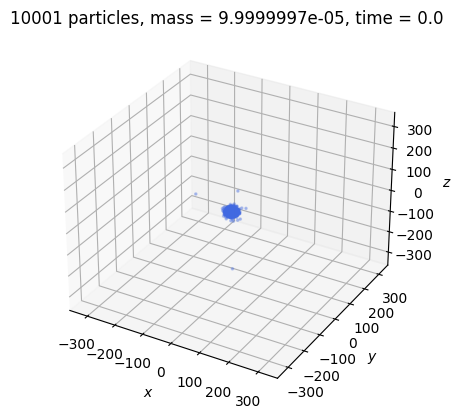

In [26]:
## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='auto')
line_ani = animation.FuncAnimation(fig, update, interval=1,   
                                   frames=tqdm(range(len(t))))

# Saving the Animation
f = fr"plummer_sphere.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif, dpi=300)

In [30]:
x

array([[  8.6795664 ,   8.6685686 ,   8.6575632 , ...,  -8.362999  ,
         -8.3793573 ,  -8.3957138 ],
       [ 17.521608  ,  17.530035  ,  17.53845   , ...,   0.46723276,
          0.48376864,   0.49960139],
       [  6.0401692 ,   6.0616779 ,   6.0831656 , ...,  -0.54389799,
         -0.52950239,  -0.51510543],
       ...,
       [ -6.3041878 ,  -6.3062434 ,  -6.3082919 , ...,   0.46768904,
          0.45030171,   0.43285093],
       [-13.920228  , -13.919188  , -13.918128  , ...,  -0.41634387,
         -0.4499951 ,  -0.48316747],
       [  5.        ,   4.9999814 ,   4.9999266 , ...,   0.32686755,
          0.31612441,   0.30486351]])